
Linear Regression:
Training RMSE: 28.12
Testing RMSE: 12.96
Training MAE: 19.11
Testing MAE: 10.76
Training SMAPE: 33.54%
Testing SMAPE: 122.45%
Training R2 Score: 0.82
Testing R2 Score: -0.14
Execution Time: 0.01 seconds
CPU Usage: 17.4%
Memory Usage: 164.55 MB


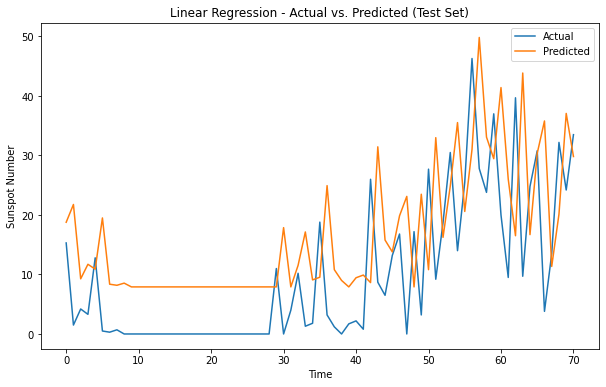


SVR:
Training RMSE: 29.50
Testing RMSE: 29.71
Training MAE: 22.48
Testing MAE: 27.71
Training SMAPE: 40.53%
Testing SMAPE: 137.20%
Training R2 Score: 0.80
Testing R2 Score: -5.01
Execution Time: 0.03 seconds
CPU Usage: 51.4%
Memory Usage: 169.15 MB


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


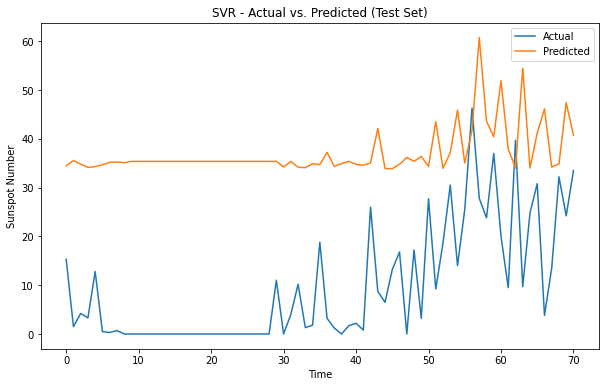


AdaBoost:
Training RMSE: 26.18
Testing RMSE: 14.51
Training MAE: 19.19
Testing MAE: 13.16
Training SMAPE: 33.73%
Testing SMAPE: 122.97%
Training R2 Score: 0.84
Testing R2 Score: -0.43
Execution Time: 0.04 seconds
CPU Usage: 14.4%
Memory Usage: 171.41 MB


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


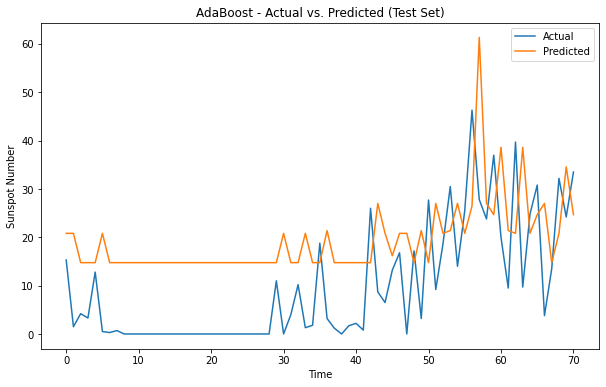

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Define models and their respective names
models = [
    (LinearRegression(), "Linear Regression"),
    (SVR(), "SVR"),
    (AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=42), "AdaBoost")
]

# Train and evaluate models
for model, model_name in models:
    start_time = time.time()
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
    test_smape = 100 * np.mean(2 * np.abs(test_predictions - y_test) / (np.abs(y_test) + np.abs(test_predictions)))
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Print evaluation metrics, execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB

    print(f"\n{model_name}:")
    print(f"Training RMSE: {train_rmse:.2f}")
    print(f"Testing RMSE: {test_rmse:.2f}")
    print(f"Training MAE: {train_mae:.2f}")
    print(f"Testing MAE: {test_mae:.2f}")
    print(f"Training SMAPE: {train_smape:.2f}%")
    print(f"Testing SMAPE: {test_smape:.2f}%")
    print(f"Training R2 Score: {train_r2:.2f}")
    print(f"Testing R2 Score: {test_r2:.2f}")
    print(f"Execution Time: {time.time() - start_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Usage: {memory_usage:.2f} MB")

    # Plot actual vs. predicted values for the test set
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual')
    plt.plot(test_predictions, label='Predicted')
    plt.title(f"{model_name} - Actual vs. Predicted (Test Set)")
    plt.xlabel('Time')
    plt.ylabel('Sunspot Number')
    plt.legend()
    plt.show()


Linear Regression Training RMSE: 28.121671000630048
Linear Regression Testing RMSE: 12.961963746660238
Linear Regression Training MAE: 19.113308527983836
Linear Regression Testing MAE: 10.756519391386945
Linear Regression Training R^2 Score: 0.8189082006683801
Linear Regression Testing R^2 Score: -0.14451363779628834
Linear Regression Training Time: 0.002992391586303711
SVR Training RMSE: 29.50431502460382
SVR Testing RMSE: 29.7078573749292
SVR Training MAE: 22.48285420727959
SVR Testing MAE: 27.706353099438292
SVR Training R^2 Score: 0.8006631409900127
SVR Testing R^2 Score: -5.01204230041008
SVR Training Time: 0.020943164825439453
AdaBoost Training RMSE: 16.696926905661993
AdaBoost Testing RMSE: 12.879897726839065
AdaBoost Training MAE: 10.821190953242873
AdaBoost Testing MAE: 11.228286384976524
AdaBoost Training R^2 Score: 0.9361604775395909
AdaBoost Testing R^2 Score: -0.13006700839483454
AdaBoost Training Time: 0.08333849906921387


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_13696/1712987046.py:130: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_data[:-1], train_data[1:])


Random Forest Training RMSE: 16.43483686582303
Random Forest Testing RMSE: 13.574601298161213
Random Forest Training MAE: 11.530188169905022
Random Forest Testing MAE: 11.32157337608864
Random Forest Training R^2 Score: 0.9381489135099288
Random Forest Testing R^2 Score: -0.2552595453452875
Random Forest Training Time: 0.17786455154418945
Gradient Boosting Training RMSE: 22.64417584893792
Gradient Boosting Testing RMSE: 12.739819268324112
Gradient Boosting Training MAE: 15.921894405485917
Gradient Boosting Testing MAE: 11.198586102899563
Gradient Boosting Training R^2 Score: 0.8825833797222632
Gradient Boosting Testing R^2 Score: -0.10562003785786755
Gradient Boosting Training Time: 0.03689885139465332


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


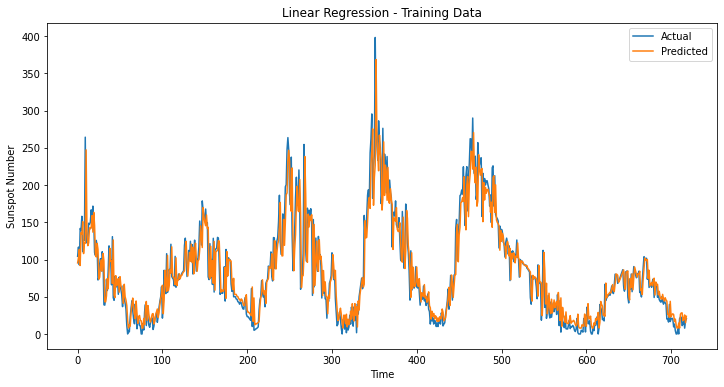

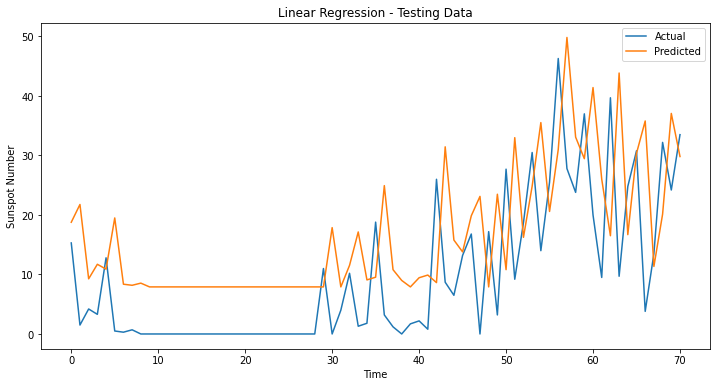

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
import psutil
import time

# Set a random seed for reproducibility
np.random.seed(42)


# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]


def train_evaluate_linear_regression(train_data, test_data):
    # Initialize the Linear Regression model
    model = LinearRegression()

    # Train the model
    model.fit(train_data[:-1], train_data[1:])

    # Make predictions on the training and testing data
    train_predictions = model.predict(train_data[:-1])
    test_predictions = model.predict(test_data[:-1])

    # Reverse the scaling of the predictions
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

    # Reverse the scaling of the actual values
    y_train = scaler.inverse_transform(train_data[1:])
    y_test = scaler.inverse_transform(test_data[1:])

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions


def train_evaluate_svr(train_data, test_data):
    # Initialize the SVR model
    model = SVR()

    # Train the model
    model.fit(train_data[:-1], train_data[1:])

    # Make predictions on the training and testing data
    train_predictions = model.predict(train_data[:-1])
    test_predictions = model.predict(test_data[:-1])

    # Reverse the scaling of the predictions
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

    # Reverse the scaling of the actual values
    y_train = scaler.inverse_transform(train_data[1:])
    y_test = scaler.inverse_transform(test_data[1:])

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions


def train_evaluate_ada_boost(train_data, test_data):
    # Initialize the AdaBoost model with DecisionTreeRegressor as the base estimator
    model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42), random_state=42)

    # Train the model
    model.fit(train_data[:-1], train_data[1:])

    # Make predictions on the training and testing data
    train_predictions = model.predict(train_data[:-1])
    test_predictions = model.predict(test_data[:-1])

    # Reverse the scaling of the predictions
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

    # Reverse the scaling of the actual values
    y_train = scaler.inverse_transform(train_data[1:])
    y_test = scaler.inverse_transform(test_data[1:])

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions


def train_evaluate_random_forest(train_data, test_data):
    # Initialize the Random Forest model
    model = RandomForestRegressor(random_state=42)

    # Train the model
    model.fit(train_data[:-1], train_data[1:])

    # Make predictions on the training and testing data
    train_predictions = model.predict(train_data[:-1])
    test_predictions = model.predict(test_data[:-1])

    # Reverse the scaling of the predictions
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

    # Reverse the scaling of the actual values
    y_train = scaler.inverse_transform(train_data[1:])
    y_test = scaler.inverse_transform(test_data[1:])

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions


def train_evaluate_gradient_boosting(train_data, test_data):
    # Initialize the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=42)

    # Train the model
    model.fit(train_data[:-1], train_data[1:])

    # Make predictions on the training and testing data
    train_predictions = model.predict(train_data[:-1])
    test_predictions = model.predict(test_data[:-1])

    # Reverse the scaling of the predictions
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

    # Reverse the scaling of the actual values
    y_train = scaler.inverse_transform(train_data[1:])
    y_test = scaler.inverse_transform(test_data[1:])

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions


# Train and evaluate Linear Regression model
start_time = time.time()
lr_train_rmse, lr_test_rmse, lr_train_mae, lr_test_mae, lr_train_r2, lr_test_r2, y_train_lr, train_pred_lr, y_test_lr, test_pred_lr = train_evaluate_linear_regression(
    train_data, test_data)
lr_time = time.time() - start_time
print("Linear Regression Training RMSE:", lr_train_rmse)
print("Linear Regression Testing RMSE:", lr_test_rmse)
print("Linear Regression Training MAE:", lr_train_mae)
print("Linear Regression Testing MAE:", lr_test_mae)
print("Linear Regression Training R^2 Score:", lr_train_r2)
print("Linear Regression Testing R^2 Score:", lr_test_r2)
print("Linear Regression Training Time:", lr_time)

# Train and evaluate SVR model
start_time = time.time()
svr_train_rmse, svr_test_rmse, svr_train_mae, svr_test_mae, svr_train_r2, svr_test_r2, y_train_svr, train_pred_svr, y_test_svr, test_pred_svr = train_evaluate_svr(
    train_data, test_data)
svr_time = time.time() - start_time
print("SVR Training RMSE:", svr_train_rmse)
print("SVR Testing RMSE:", svr_test_rmse)
print("SVR Training MAE:", svr_train_mae)
print("SVR Testing MAE:", svr_test_mae)
print("SVR Training R^2 Score:", svr_train_r2)
print("SVR Testing R^2 Score:", svr_test_r2)
print("SVR Training Time:", svr_time)

# Train and evaluate AdaBoost model
start_time = time.time()
ada_train_rmse, ada_test_rmse, ada_train_mae, ada_test_mae, ada_train_r2, ada_test_r2, y_train_ada, train_pred_ada, y_test_ada, test_pred_ada = train_evaluate_ada_boost(
    train_data, test_data)
ada_time = time.time() - start_time
print("AdaBoost Training RMSE:", ada_train_rmse)
print("AdaBoost Testing RMSE:", ada_test_rmse)
print("AdaBoost Training MAE:", ada_train_mae)
print("AdaBoost Testing MAE:", ada_test_mae)
print("AdaBoost Training R^2 Score:", ada_train_r2)
print("AdaBoost Testing R^2 Score:", ada_test_r2)
print("AdaBoost Training Time:", ada_time)

# Train and evaluate Random Forest model
start_time = time.time()
rf_train_rmse, rf_test_rmse, rf_train_mae, rf_test_mae, rf_train_r2, rf_test_r2, y_train_rf, train_pred_rf, y_test_rf, test_pred_rf = train_evaluate_random_forest(
    train_data, test_data)
rf_time = time.time() - start_time
print("Random Forest Training RMSE:", rf_train_rmse)
print("Random Forest Testing RMSE:", rf_test_rmse)
print("Random Forest Training MAE:", rf_train_mae)
print("Random Forest Testing MAE:", rf_test_mae)
print("Random Forest Training R^2 Score:", rf_train_r2)
print("Random Forest Testing R^2 Score:", rf_test_r2)
print("Random Forest Training Time:", rf_time)

# Train and evaluate Gradient Boosting model
start_time = time.time()
gb_train_rmse, gb_test_rmse, gb_train_mae, gb_test_mae, gb_train_r2, gb_test_r2, y_train_gb, train_pred_gb, y_test_gb, test_pred_gb = train_evaluate_gradient_boosting(
    train_data, test_data)
gb_time = time.time() - start_time
print("Gradient Boosting Training RMSE:", gb_train_rmse)
print("Gradient Boosting Testing RMSE:", gb_test_rmse)
print("Gradient Boosting Training MAE:", gb_train_mae)
print("Gradient Boosting Testing MAE:", gb_test_mae)
print("Gradient Boosting Training R^2 Score:", gb_train_r2)
print("Gradient Boosting Testing R^2 Score:", gb_test_r2)
print("Gradient Boosting Training Time:", gb_time)


# Plot the actual and predicted values for the Linear Regression model
plt.figure(figsize=(12, 6))
plt.plot(y_train_lr, label='Actual')
plt.plot(train_pred_lr, label='Predicted')
plt.title('Linear Regression - Training Data')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test_lr, label='Actual')
plt.plot(test_pred_lr, label='Predicted')
plt.title('Linear Regression - Testing Data')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.layers import GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Split into input and output variables
X_train = train_data[:-1]
y_train = train_data[1:]
X_test = test_data[:-1]
y_test = test_data[1:]

# Linear Regression
start_time = time.time()
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
lr_training_time = time.time() - start_time
print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression MAE:", lr_mae)
print("Linear Regression R-squared:", lr_r2)
print("Linear Regression Training Time:", lr_training_time)

# SVR
start_time = time.time()
svr = SVR()
svr.fit(X_train, y_train.ravel())
svr_predictions = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
svr_training_time = time.time() - start_time
print("SVR RMSE:", svr_rmse)
print("SVR MAE:", svr_mae)
print("SVR R-squared:", svr_r2)
print("SVR Training Time:", svr_training_time)

# AdaBoost with DecisionTreeRegressor
start_time = time.time()
ada_boost = AdaBoostRegressor()
ada_boost.fit(X_train, y_train.ravel())
ada_boost_predictions = ada_boost.predict(X_test)
ada_boost_mse = mean_squared_error(y_test, ada_boost_predictions)
ada_boost_rmse = np.sqrt(ada_boost_mse)
ada_boost_mae = mean_absolute_error(y_test, ada_boost_predictions)
ada_boost_r2 = r2_score(y_test, ada_boost_predictions)
ada_boost_training_time = time.time() - start_time
print("AdaBoost RMSE:", ada_boost_rmse)
print("AdaBoost MAE:", ada_boost_mae)
print("AdaBoost R-squared:", ada_boost_r2)
print("AdaBoost Training Time:", ada_boost_training_time)

# RandomForestRegressor
start_time = time.time()
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train.ravel())
random_forest_predictions = random_forest.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
random_forest_training_time = time.time() - start_time
print("Random Forest RMSE:", random_forest_rmse)
print("Random Forest MAE:", random_forest_mae)
print("Random Forest R-squared:", random_forest_r2)
print("Random Forest Training Time:", random_forest_training_time)

# GradientBoostingRegressor
start_time = time.time()
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train.ravel())
gradient_boosting_predictions = gradient_boosting.predict(X_test)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
gradient_boosting_rmse = np.sqrt(gradient_boosting_mse)
gradient_boosting_mae = mean_absolute_error(y_test, gradient_boosting_predictions)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_predictions)
gradient_boosting_training_time = time.time() - start_time
print("Gradient Boosting RMSE:", gradient_boosting_rmse)
print("Gradient Boosting MAE:", gradient_boosting_mae)
print("Gradient Boosting R-squared:", gradient_boosting_r2)
print("Gradient Boosting Training Time:", gradient_boosting_training_time)

# LSTM
start_time = time.time()
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1], 1)))
lstm.add(Dense(1))
lstm.compile(loss='mse', optimizer='adam')
lstm.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
lstm_predictions = lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)
lstm_training_time = time.time() - start_time
print("LSTM RMSE:", lstm_rmse)
print("LSTM MAE:", lstm_mae)
print("LSTM R-squared:", lstm_r2)
print("LSTM Training Time:", lstm_training_time)

# Stacked LSTM
start_time = time.time()
stacked_lstm = Sequential()
stacked_lstm.add(LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences=True))
stacked_lstm.add(LSTM(32))
stacked_lstm.add(Dense(1))
stacked_lstm.compile(loss='mse', optimizer='adam')
stacked_lstm.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
stacked_lstm_predictions = stacked_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
stacked_lstm_mse = mean_squared_error(y_test, stacked_lstm_predictions)
stacked_lstm_rmse = np.sqrt(stacked_lstm_mse)
stacked_lstm_mae = mean_absolute_error(y_test, stacked_lstm_predictions)
stacked_lstm_r2 = r2_score(y_test, stacked_lstm_predictions)
stacked_lstm_training_time = time.time() - start_time
print("Stacked LSTM RMSE:", stacked_lstm_rmse)
print("Stacked LSTM MAE:", stacked_lstm_mae)
print("Stacked LSTM R-squared:", stacked_lstm_r2)
print("Stacked LSTM Training Time:", stacked_lstm_training_time)

# Bidirectional LSTM
start_time = time.time()
bidirectional_lstm = Sequential()
bidirectional_lstm.add(Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)))
bidirectional_lstm.add(Dense(1))
bidirectional_lstm.compile(loss='mse', optimizer='adam')
bidirectional_lstm.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
bidirectional_lstm_predictions = bidirectional_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
bidirectional_lstm_mse = mean_squared_error(y_test, bidirectional_lstm_predictions)
bidirectional_lstm_rmse = np.sqrt(bidirectional_lstm_mse)
bidirectional_lstm_mae = mean_absolute_error(y_test, bidirectional_lstm_predictions)
bidirectional_lstm_r2 = r2_score(y_test, bidirectional_lstm_predictions)
bidirectional_lstm_training_time = time.time() - start_time
print("Bidirectional LSTM RMSE:", bidirectional_lstm_rmse)
print("Bidirectional LSTM MAE:", bidirectional_lstm_mae)
print("Bidirectional LSTM R-squared:", bidirectional_lstm_r2)
print("Bidirectional LSTM Training Time:", bidirectional_lstm_training_time)

# GRU
start_time = time.time()
gru_model = Sequential()
gru_model.add(GRU(32, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dense(1))
gru_model.compile(loss='mse', optimizer='adam')
gru_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
gru_predictions = gru_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
gru_mse = mean_squared_error(y_test, gru_predictions)
gru_rmse = np.sqrt(gru_mse)
gru_mae = mean_absolute_error(y_test, gru_predictions)
gru_r2 = r2_score(y_test, gru_predictions)
gru_training_time = time.time() - start_time
print("GRU RMSE:", gru_rmse)
print("GRU MAE:", gru_mae)
print("GRU R-squared:", gru_r2)
print("GRU Training Time:", gru_training_time)

# ETS
start_time = time.time()
ets_model = ExponentialSmoothing(y_train.ravel())
ets_fit = ets_model.fit()
ets_predictions = ets_fit.forecast(len(y_test))
ets_mse = mean_squared_error(y_test, ets_predictions)
ets_rmse = np.sqrt(ets_mse)
ets_mae = mean_absolute_error(y_test, ets_predictions)
ets_r2 = r2_score(y_test, ets_predictions)
ets_training_time = time.time() - start_time
print("ETS RMSE:", ets_rmse)
print("ETS MAE:", ets_mae)
print("ETS R-squared:", ets_r2)
print("ETS Training Time:", ets_training_time)



C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Linear Regression RMSE: 0.03255139062446067
Linear Regression MAE: 0.02701285633196119
Linear Regression R-squared: -0.14451363779628834
Linear Regression Training Time: 0.0021309852600097656
SVR RMSE: 0.07460536759148467
SVR MAE: 0.0695789881954754
SVR R-squared: -5.012042300410079
SVR Training Time: 0.012001276016235352
AdaBoost RMSE: 0.042881976422751704
AdaBoost MAE: 0.03900549074115685
AdaBoost R-squared: -0.9862388210025812
AdaBoost Training Time: 0.027890443801879883
Random Forest RMSE: 0.03422712209842093
Random Forest MAE: 0.028614733633406716
Random Forest R-squared: -0.26538489730066495
Random Forest Training Time: 0.17111873626708984
Gradient Boosting RMSE: 0.03199351900633881
Gradient Boosting MAE: 0.02812301884203808
Gradient Boosting R-squared: -0.10562003785786733
Gradient Boosting Training Time: 0.03889298439025879
3/3 [==============================] - 0s 2ms/step
LSTM RMSE: 0.034395766185247444
LSTM MAE: 0.028901645390151363
LSTM R-squared: -0.2778852420263631
LSTM T

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.layers import GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Split into input and output variables
X_train = train_data[:-1]
y_train = train_data[1:]
X_test = test_data[:-1]
y_test = test_data[1:]

# Define the regression models to be evaluated
models = [
    LinearRegression(),
    SVR(),
    AdaBoostRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Train and evaluate each model
for model in models:
    start_time = time.time()
    model.fit(X_train, y_train.ravel())
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time
    
    model_name = model.__class__.__name__
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R-squared: {r2}")
    print(f"{model_name} Training Time: {training_time}")
    print()
    
# Define the deep learning models to be evaluated
deep_learning_models = [
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "LSTM"),
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences=True), LSTM(32), Dense(1)]), "Stacked LSTM"),
    (Sequential([Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)), Dense(1)]), "Bidirectional LSTM"),
    (Sequential([GRU(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "GRU")
]

# Train and evaluate each deep learning model
for model, model_name in deep_learning_models:
    start_time = time.time()
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
    predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time
    
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R-squared: {r2}")
    print(f"{model_name} Training Time: {training_time}")
    print()

# Exponential Smoothing
start_time = time.time()
ets_model = ExponentialSmoothing(y_train.ravel())
ets_fit = ets_model.fit()
ets_predictions = ets_fit.forecast(len(y_test))
ets_mse = mean_squared_error(y_test, ets_predictions)
ets_rmse = np.sqrt(ets_mse)
ets_mae = mean_absolute_error(y_test, ets_predictions)
ets_r2 = r2_score(y_test, ets_predictions)
ets_training_time = time.time() - start_time
print("ETS RMSE:", ets_rmse)
print("ETS MAE:", ets_mae)
print("ETS R-squared:", ets_r2)
print("ETS Training Time:", ets_training_time)


LinearRegression RMSE: 0.03255139062446067
LinearRegression MAE: 0.02701285633196119
LinearRegression R-squared: -0.14451363779628834
LinearRegression Training Time: 0.0024728775024414062

SVR RMSE: 0.07460536759148467
SVR MAE: 0.0695789881954754
SVR R-squared: -5.012042300410079
SVR Training Time: 0.023879289627075195

AdaBoostRegressor RMSE: 0.042881976422751704
AdaBoostRegressor MAE: 0.03900549074115685
AdaBoostRegressor R-squared: -0.9862388210025812
AdaBoostRegressor Training Time: 0.04886484146118164

RandomForestRegressor RMSE: 0.03422712209842093
RandomForestRegressor MAE: 0.028614733633406716
RandomForestRegressor R-squared: -0.26538489730066495
RandomForestRegressor Training Time: 0.15314030647277832

GradientBoostingRegressor RMSE: 0.03199351900633881
GradientBoostingRegressor MAE: 0.02812301884203808
GradientBoostingRegressor R-squared: -0.10562003785786733
GradientBoostingRegressor Training Time: 0.03589010238647461

3/3 [==============================] - 0s 2ms/step
LSTM 

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.layers import GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Split into input and output variables
X_train = train_data[:-1]
y_train = train_data[1:]
X_test = test_data[:-1]
y_test = test_data[1:]

# Define the regression models to be evaluated
models = [
    LinearRegression(),
    SVR(),
    AdaBoostRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Train and evaluate each model
for model in models:
    start_time = time.time()
    model.fit(X_train, y_train.ravel())
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time
    
    model_name = model.__class__.__name__
    
    # Measure execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = process.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024
    
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R-squared: {r2}")
    print(f"{model_name} Training Time: {training_time}")
    print(f"{model_name} Execution Time: {time.time() - start_time} seconds")
    print(f"{model_name} CPU Usage: {cpu_usage} MHz")
    print(f"{model_name} Memory Used: {memory_usage} MB")
    print()

# Define the deep learning models to be evaluated
deep_learning_models = [
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "LSTM"),
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences=True), LSTM(32), Dense(1)]), "Stacked LSTM"),
    (Sequential([Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)), Dense(1)]), "Bidirectional LSTM"),
    (Sequential([GRU(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "GRU")
]

# Train and evaluate each deep learning model
for model, model_name in deep_learning_models:
    start_time = time.time()
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
    predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time
    
    # Measure execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = process.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024
    
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R-squared: {r2}")
    print(f"{model_name} Training Time: {training_time}")
    print(f"{model_name} Execution Time: {time.time() - start_time} seconds")
    print(f"{model_name} CPU Usage: {cpu_usage} MHz")
    print(f"{model_name} Memory Used: {memory_usage} MB")
    print()

# Exponential Smoothing
start_time = time.time()
ets_model = ExponentialSmoothing(y_train.ravel())
ets_fit = ets_model.fit()
ets_predictions = ets_fit.forecast(len(y_test))
ets_mse = mean_squared_error(y_test, ets_predictions)
ets_rmse = np.sqrt(ets_mse)
ets_mae = mean_absolute_error(y_test, ets_predictions)
ets_r2 = r2_score(y_test, ets_predictions)
ets_training_time = time.time() - start_time

# Measure execution time, CPU usage, and memory usage
process = psutil.Process()
cpu_usage = process.cpu_percent()
memory_usage = process.memory_info().rss / 1024 / 1024

print("ETS RMSE:", ets_rmse)
print("ETS MAE:", ets_mae)
print("ETS R-squared:", ets_r2)
print("ETS Training Time:", ets_training_time)
print("ETS Execution Time:", time.time() - start_time, "seconds")
print("ETS CPU Usage:", cpu_usage, "MHz")
print("ETS Memory Used:", memory_usage, "MB")


LinearRegression RMSE: 0.03255139062446067
LinearRegression MAE: 0.02701285633196119
LinearRegression R-squared: -0.14451363779628834
LinearRegression Training Time: 0.002414226531982422
LinearRegression Execution Time: 0.002414226531982422 seconds
LinearRegression CPU Usage: 0.0 MHz
LinearRegression Memory Used: 1001.80859375 MB

SVR RMSE: 0.07460536759148467
SVR MAE: 0.0695789881954754
SVR R-squared: -5.012042300410079
SVR Training Time: 0.012544393539428711
SVR Execution Time: 0.012544393539428711 seconds
SVR CPU Usage: 0.0 MHz
SVR Memory Used: 1001.80859375 MB

AdaBoostRegressor RMSE: 0.042881976422751704
AdaBoostRegressor MAE: 0.03900549074115685
AdaBoostRegressor R-squared: -0.9862388210025812
AdaBoostRegressor Training Time: 0.024934053421020508
AdaBoostRegressor Execution Time: 0.024934053421020508 seconds
AdaBoostRegressor CPU Usage: 0.0 MHz
AdaBoostRegressor Memory Used: 1001.80859375 MB

RandomForestRegressor RMSE: 0.03422712209842093
RandomForestRegressor MAE: 0.02861473363

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.layers import GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Split into input and output variables
X_train = train_data[:-1]
y_train = train_data[1:]
X_test = test_data[:-1]
y_test = test_data[1:]

# Define the regression models to be evaluated
models = [
    LinearRegression(),
    SVR(),
    AdaBoostRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Train and evaluate each model
for model in models:
    start_time = time.time()
    model.fit(X_train, y_train.ravel())
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time
    
    model_name = model.__class__.__name__
    
    # Measure execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = process.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024
    
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R-squared: {r2}")
    print(f"{model_name} Training Time: {training_time}")
    print(f"{model_name} Execution Time: {time.time() - start_time} seconds")
    print(f"{model_name} CPU Usage: {cpu_usage:.5f} MHz")
    print(f"{model_name} Memory Used: {memory_usage:.2f} MB")
    print()

# Define the deep learning models to be evaluated
deep_learning_models = [
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "LSTM"),
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences=True), LSTM(32), Dense(1)]), "Stacked LSTM"),
    (Sequential([Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)), Dense(1)]), "Bidirectional LSTM"),
    (Sequential([GRU(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "GRU")
]

# Train and evaluate each deep learning model
for model, model_name in deep_learning_models:
    start_time = time.time()
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
    predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time
    
    # Measure execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = process.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024
    
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R-squared: {r2}")
    print(f"{model_name} Training Time: {training_time}")
    print(f"{model_name} Execution Time: {time.time() - start_time} seconds")
    print(f"{model_name} CPU Usage: {cpu_usage:.5f} MHz")
    print(f"{model_name} Memory Used: {memory_usage:.2f} MB")
    print()

# Exponential Smoothing
start_time = time.time()
ets_model = ExponentialSmoothing(y_train.ravel())
ets_fit = ets_model.fit()
ets_predictions = ets_fit.forecast(len(y_test))
ets_mse = mean_squared_error(y_test, ets_predictions)
ets_rmse = np.sqrt(ets_mse)
ets_mae = mean_absolute_error(y_test, ets_predictions)
ets_r2 = r2_score(y_test, ets_predictions)
ets_training_time = time.time() - start_time

# Measure execution time, CPU usage, and memory usage
process = psutil.Process()
cpu_usage = process.cpu_percent()
memory_usage = process.memory_info().rss / 1024 / 1024

print("ETS RMSE:", ets_rmse)
print("ETS MAE:", ets_mae)
print("ETS R-squared:", ets_r2)
print("ETS Training Time:", ets_training_time)
print("ETS Execution Time:", time.time() - start_time, "seconds")
print("ETS CPU Usage:", f"{cpu_usage:.5f}", "MHz")
print("ETS Memory Used:", f"{memory_usage:.2f}", "MB")


LinearRegression RMSE: 0.03255139062446067
LinearRegression MAE: 0.02701285633196119
LinearRegression R-squared: -0.14451363779628834
LinearRegression Training Time: 0.002000570297241211
LinearRegression Execution Time: 0.002000570297241211 seconds
LinearRegression CPU Usage: 0.00000 MHz
LinearRegression Memory Used: 1230.56 MB

SVR RMSE: 0.07460536759148467
SVR MAE: 0.0695789881954754
SVR R-squared: -5.012042300410079
SVR Training Time: 0.010998964309692383
SVR Execution Time: 0.011291980743408203 seconds
SVR CPU Usage: 0.00000 MHz
SVR Memory Used: 1230.56 MB

AdaBoostRegressor RMSE: 0.042881976422751704
AdaBoostRegressor MAE: 0.03900549074115685
AdaBoostRegressor R-squared: -0.9862388210025812
AdaBoostRegressor Training Time: 0.029592275619506836
AdaBoostRegressor Execution Time: 0.029592275619506836 seconds
AdaBoostRegressor CPU Usage: 0.00000 MHz
AdaBoostRegressor Memory Used: 1230.56 MB

RandomForestRegressor RMSE: 0.03422712209842093
RandomForestRegressor MAE: 0.02861473363340671

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.layers import GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Split into input and output variables
X_train = train_data[:-1]
y_train = train_data[1:]
X_test = test_data[:-1]
y_test = test_data[1:]

# Define the regression models to be evaluated
models = [
    LinearRegression(),
    SVR(),
    AdaBoostRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Train and evaluate each model
for model in models:
    start_time = time.time()
    model.fit(X_train, y_train.ravel())
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time
    
    model_name = model.__class__.__name__
    
    # Measure execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_freq = psutil.cpu_freq().current
    memory_usage = process.memory_info().rss / 1024 / 1024
    
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R-squared: {r2}")
    print(f"{model_name} Training Time: {training_time}")
    print(f"{model_name} Execution Time: {time.time() - start_time} seconds")
    print(f"{model_name} CPU Frequency: {cpu_freq:.2f} MHz")
    print(f"{model_name} Memory Used: {memory_usage:.2f} MB")
    print()

# Define the deep learning models to be evaluated
deep_learning_models = [
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "LSTM"),
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences=True), LSTM(32), Dense(1)]), "Stacked LSTM"),
    (Sequential([Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)), Dense(1)]), "Bidirectional LSTM"),
    (Sequential([GRU(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "GRU")
]

# Train and evaluate each deep learning model
for model, model_name in deep_learning_models:
    start_time = time.time()
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
    predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time
    
    # Measure execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_freq = psutil.cpu_freq().current
    memory_usage = process.memory_info().rss / 1024 / 1024
    
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R-squared: {r2}")
    print(f"{model_name} Training Time: {training_time}")
    print(f"{model_name} Execution Time: {time.time() - start_time} seconds")
    print(f"{model_name} CPU Frequency: {cpu_freq:.2f} MHz")
    print(f"{model_name} Memory Used: {memory_usage:.2f} MB")
    print()

# Exponential Smoothing
start_time = time.time()
ets_model = ExponentialSmoothing(y_train.ravel())
ets_fit = ets_model.fit()
ets_predictions = ets_fit.forecast(len(y_test))
ets_mse = mean_squared_error(y_test, ets_predictions)
ets_rmse = np.sqrt(ets_mse)
ets_mae = mean_absolute_error(y_test, ets_predictions)
ets_r2 = r2_score(y_test, ets_predictions)
ets_training_time = time.time() - start_time

# Measure execution time, CPU usage, and memory usage
process = psutil.Process()
cpu_freq = psutil.cpu_freq().current
memory_usage = process.memory_info().rss / 1024 / 1024

print("ETS RMSE:", ets_rmse)
print("ETS MAE:", ets_mae)
print("ETS R-squared:", ets_r2)
print("ETS Training Time:", ets_training_time)
print("ETS Execution Time:", time.time() - start_time, "seconds")
print("ETS CPU Frequency:", cpu_freq, "MHz")
print("ETS Memory Used:", memory_usage, "MB")


LinearRegression RMSE: 0.03255139062446067
LinearRegression MAE: 0.02701285633196119
LinearRegression R-squared: -0.14451363779628834
LinearRegression Training Time: 0.0012180805206298828
LinearRegression Execution Time: 0.0015769004821777344 seconds
LinearRegression CPU Frequency: 1792.00 MHz
LinearRegression Memory Used: 1386.14 MB

SVR RMSE: 0.07460536759148467
SVR MAE: 0.0695789881954754
SVR R-squared: -5.012042300410079
SVR Training Time: 0.0133819580078125
SVR Execution Time: 0.0133819580078125 seconds
SVR CPU Frequency: 1792.00 MHz
SVR Memory Used: 1386.14 MB

AdaBoostRegressor RMSE: 0.042881976422751704
AdaBoostRegressor MAE: 0.03900549074115685
AdaBoostRegressor R-squared: -0.9862388210025812
AdaBoostRegressor Training Time: 0.03436899185180664
AdaBoostRegressor Execution Time: 0.03436899185180664 seconds
AdaBoostRegressor CPU Frequency: 1792.00 MHz
AdaBoostRegressor Memory Used: 1386.14 MB

RandomForestRegressor RMSE: 0.03422712209842093
RandomForestRegressor MAE: 0.028614733

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.layers import GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Split into input and output variables
X_train = train_data[:-1]
y_train = train_data[1:]
X_test = test_data[:-1]
y_test = test_data[1:]

# Define the regression models to be evaluated
models = [
    LinearRegression(),
    SVR(),
    AdaBoostRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Train and evaluate each model
for model in models:
    start_time = time.time()
    model.fit(X_train, y_train.ravel())
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time
    
    model_name = model.__class__.__name__
    cpu_usage = psutil.cpu_freq().current  # Get current CPU frequency
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R-squared: {r2}")
    print(f"{model_name} Training Time: {training_time}")
    print(f"{model_name} CPU Frequency: {cpu_usage:.2f} MHz")
    print()

# Define the deep learning models to be evaluated
deep_learning_models = [
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "LSTM"),
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences=True), LSTM(32), Dense(1)]), "Stacked LSTM"),
    (Sequential([Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)), Dense(1)]), "Bidirectional LSTM"),
    (Sequential([GRU(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "GRU")
]

# Train and evaluate each deep learning model
for model, model_name in deep_learning_models:
    start_time = time.time()
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
    predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time
    
    cpu_usage = psutil.cpu_freq().current  # Get current CPU frequency
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R-squared: {r2}")
    print(f"{model_name} Training Time: {training_time}")
    print(f"{model_name} CPU Frequency: {cpu_usage:.2f} MHz")
    print()

# Exponential Smoothing
start_time = time.time()
ets_model = ExponentialSmoothing(y_train.ravel())
ets_fit = ets_model.fit()
ets_predictions = ets_fit.forecast(len(y_test))
ets_mse = mean_squared_error(y_test, ets_predictions)
ets_rmse = np.sqrt(ets_mse)
ets_mae = mean_absolute_error(y_test, ets_predictions)
ets_r2 = r2_score(y_test, ets_predictions)
ets_training_time = time.time() - start_time

cpu_usage = psutil.cpu_freq().current  # Get current CPU frequency
print("ETS RMSE:", ets_rmse)
print("ETS MAE:", ets_mae)
print("ETS R-squared:", ets_r2)
print("ETS Training Time:", ets_training_time)
print("ETS CPU Frequency:", cpu_usage)


LinearRegression RMSE: 0.03255139062446067
LinearRegression MAE: 0.02701285633196119
LinearRegression R-squared: -0.14451363779628834
LinearRegression Training Time: 0.001993894577026367
LinearRegression CPU Frequency: 1792.00 MHz

SVR RMSE: 0.07460536759148467
SVR MAE: 0.0695789881954754
SVR R-squared: -5.012042300410079
SVR Training Time: 0.012606382369995117
SVR CPU Frequency: 1792.00 MHz

AdaBoostRegressor RMSE: 0.042881976422751704
AdaBoostRegressor MAE: 0.03900549074115685
AdaBoostRegressor R-squared: -0.9862388210025812
AdaBoostRegressor Training Time: 0.02991962432861328
AdaBoostRegressor CPU Frequency: 1792.00 MHz

RandomForestRegressor RMSE: 0.03422712209842093
RandomForestRegressor MAE: 0.028614733633406716
RandomForestRegressor R-squared: -0.26538489730066495
RandomForestRegressor Training Time: 0.14868879318237305
RandomForestRegressor CPU Frequency: 1792.00 MHz

GradientBoostingRegressor RMSE: 0.03199351900633881
GradientBoostingRegressor MAE: 0.02812301884203808
Gradient

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.layers import GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Split into input and output variables
X_train = train_data[:-1]
y_train = train_data[1:]
X_test = test_data[:-1]
y_test = test_data[1:]

# Define the regression models to be evaluated
models = [
    LinearRegression(),
    SVR(),
    AdaBoostRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Train and evaluate each model
for model in models:
    start_time = time.time()
    model.fit(X_train, y_train.ravel())
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time

    model_name = model.__class__.__name__
    cpu_usage = psutil.cpu_freq().current  # Get current CPU frequency
    mem_usage = psutil.Process().memory_info().rss / (1024 ** 2)  # Get memory usage in MB
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R-squared: {r2}")
    print(f"{model_name} Training Time: {training_time}")
    print(f"{model_name} CPU Frequency: {cpu_usage:.2f} MHz")
    print(f"{model_name} Memory Used: {mem_usage:.2f} MB")
    print()

# Define the deep learning models to be evaluated
deep_learning_models = [
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "LSTM"),
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences=True), LSTM(32), Dense(1)]), "Stacked LSTM"),
    (Sequential([Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)), Dense(1)]), "Bidirectional LSTM"),
    (Sequential([GRU(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "GRU")
]

# Train and evaluate each deep learning model
for model, model_name in deep_learning_models:
    start_time = time.time()
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
    predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time

    cpu_usage = psutil.cpu_freq().current  # Get current CPU frequency
    mem_usage = psutil.Process().memory_info().rss / (1024 ** 2)  # Get memory usage in MB
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R-squared: {r2}")
    print(f"{model_name} Training Time: {training_time}")
    print(f"{model_name} CPU Frequency: {cpu_usage:.2f} MHz")
    print(f"{model_name} Memory Used: {mem_usage:.2f} MB")
    print()

# Exponential Smoothing
start_time = time.time()
ets_model = ExponentialSmoothing(y_train.ravel())
ets_fit = ets_model.fit()
ets_predictions = ets_fit.forecast(len(y_test))
ets_mse = mean_squared_error(y_test, ets_predictions)
ets_rmse = np.sqrt(ets_mse)
ets_mae = mean_absolute_error(y_test, ets_predictions)
ets_r2 = r2_score(y_test, ets_predictions)
ets_training_time = time.time() - start_time

cpu_usage = psutil.cpu_freq().current  # Get current CPU frequency
mem_usage = psutil.Process().memory_info().rss / (1024 ** 2)  # Get memory usage in MB
print("ETS RMSE:", ets_rmse)
print("ETS MAE:", ets_mae)
print("ETS R-squared:", ets_r2)
print("ETS Training Time:", ets_training_time)
print("ETS CPU Frequency:", cpu_usage)
print("ETS Memory Used:", mem_usage)


LinearRegression RMSE: 0.03255139062446067
LinearRegression MAE: 0.02701285633196119
LinearRegression R-squared: -0.14451363779628834
LinearRegression Training Time: 0.0010001659393310547
LinearRegression CPU Frequency: 1792.00 MHz
LinearRegression Memory Used: 1423.86 MB

SVR RMSE: 0.07460536759148467
SVR MAE: 0.0695789881954754
SVR R-squared: -5.012042300410079
SVR Training Time: 0.01206827163696289
SVR CPU Frequency: 1792.00 MHz
SVR Memory Used: 1423.86 MB

AdaBoostRegressor RMSE: 0.042881976422751704
AdaBoostRegressor MAE: 0.03900549074115685
AdaBoostRegressor R-squared: -0.9862388210025812
AdaBoostRegressor Training Time: 0.029853105545043945
AdaBoostRegressor CPU Frequency: 1792.00 MHz
AdaBoostRegressor Memory Used: 1423.86 MB

RandomForestRegressor RMSE: 0.03422712209842093
RandomForestRegressor MAE: 0.028614733633406716
RandomForestRegressor R-squared: -0.26538489730066495
RandomForestRegressor Training Time: 0.1576533317565918
RandomForestRegressor CPU Frequency: 1792.00 MHz
R

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.layers import GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Split into input and output variables
X_train = train_data[:-1]
y_train = train_data[1:]
X_test = test_data[:-1]
y_test = test_data[1:]

# Define the regression models to be evaluated
models = [
    LinearRegression(),
    SVR(),
    AdaBoostRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Train and evaluate each model
for model in models:
    start_time = time.time()
    model.fit(X_train, y_train.ravel())
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time

    model_name = model.__class__.__name__
    cpu_usage = psutil.cpu_freq().current  # Get current CPU frequency
    mem_usage = psutil.Process().memory_info().rss / (1024 ** 2)  # Get memory usage in MB
    print(f"{model_name} RMSE: {rmse:.5f}")
    print(f"{model_name} MAE: {mae:.5f}")
    print(f"{model_name} R-squared: {r2:.5f}")
    print(f"{model_name} Training Time: {training_time:.5f}")
    print(f"{model_name} CPU Frequency: {cpu_usage:.5f} MHz")
    print(f"{model_name} Memory Used: {mem_usage:.5f} MB")
    print()

# Define the deep learning models to be evaluated
deep_learning_models = [
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "LSTM"),
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences=True), LSTM(32), Dense(1)]), "Stacked LSTM"),
    (Sequential([Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)), Dense(1)]), "Bidirectional LSTM"),
    (Sequential([GRU(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "GRU")
]

# Train and evaluate each deep learning model
for model, model_name in deep_learning_models:
    start_time = time.time()
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
    predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time

    cpu_usage = psutil.cpu_freq().current  # Get current CPU frequency
    mem_usage = psutil.Process().memory_info().rss / (1024 ** 2)  # Get memory usage in MB
    print(f"{model_name} RMSE: {rmse:.5f}")
    print(f"{model_name} MAE: {mae:.5f}")
    print(f"{model_name} R-squared: {r2:.5f}")
    print(f"{model_name} Training Time: {training_time:.5f}")
    print(f"{model_name} CPU Frequency: {cpu_usage:.5f} MHz")
    print(f"{model_name} Memory Used: {mem_usage:.5f} MB")
    print()

# Exponential Smoothing
start_time = time.time()
ets_model = ExponentialSmoothing(y_train.ravel())
ets_fit = ets_model.fit()
ets_predictions = ets_fit.forecast(len(y_test))
ets_mse = mean_squared_error(y_test, ets_predictions)
ets_rmse = np.sqrt(ets_mse)
ets_mae = mean_absolute_error(y_test, ets_predictions)
ets_r2 = r2_score(y_test, ets_predictions)
ets_training_time = time.time() - start_time

cpu_usage = psutil.cpu_freq().current  # Get current CPU frequency
mem_usage = psutil.Process().memory_info().rss / (1024 ** 2)  # Get memory usage in MB
print("ETS RMSE:", ets_rmse)
print("ETS MAE:", ets_mae)
print("ETS R-squared:", ets_r2)
print("ETS Training Time:", ets_training_time)
print("ETS CPU Frequency:", cpu_usage)
print("ETS Memory Used:", mem_usage)


LinearRegression RMSE: 0.03255
LinearRegression MAE: 0.02701
LinearRegression R-squared: -0.14451
LinearRegression Training Time: 0.00192
LinearRegression CPU Frequency: 1792.00000 MHz
LinearRegression Memory Used: 1396.44141 MB

SVR RMSE: 0.07461
SVR MAE: 0.06958
SVR R-squared: -5.01204
SVR Training Time: 0.01174
SVR CPU Frequency: 1792.00000 MHz
SVR Memory Used: 1396.44141 MB

AdaBoostRegressor RMSE: 0.04288
AdaBoostRegressor MAE: 0.03901
AdaBoostRegressor R-squared: -0.98624
AdaBoostRegressor Training Time: 0.03103
AdaBoostRegressor CPU Frequency: 1792.00000 MHz
AdaBoostRegressor Memory Used: 1396.44141 MB

RandomForestRegressor RMSE: 0.03423
RandomForestRegressor MAE: 0.02861
RandomForestRegressor R-squared: -0.26538
RandomForestRegressor Training Time: 0.15339
RandomForestRegressor CPU Frequency: 1792.00000 MHz
RandomForestRegressor Memory Used: 1397.00000 MB

GradientBoostingRegressor RMSE: 0.03199
GradientBoostingRegressor MAE: 0.02812
GradientBoostingRegressor R-squared: -0.105

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.layers import GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Split into input and output variables
X_train = train_data[:-1]
y_train = train_data[1:]
X_test = test_data[:-1]
y_test = test_data[1:]

# Define the regression models to be evaluated
models = [
    LinearRegression(),
    SVR(),
    AdaBoostRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Define a dictionary to store the predictions
all_predictions = {'True Value': y_test.ravel()}

# Train and evaluate each model
for model in models:
    start_time = time.time()
    model.fit(X_train, y_train.ravel())
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time

    model_name = model.__class__.__name__
    all_predictions[model_name] = predictions.reshape(-1)
    
    print(f"{model_name} RMSE: {rmse:.5f}")
    print(f"{model_name} MAE: {mae:.5f}")
    print(f"{model_name} R-squared: {r2:.5f}")
    print(f"{model_name} Training Time: {training_time:.5f}")
    print()

# Define the deep learning models to be evaluated
deep_learning_models = [
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "LSTM"),
    (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences=True), LSTM(32), Dense(1)]), "Stacked LSTM"),
    (Sequential([Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)), Dense(1)]), "Bidirectional LSTM"),
    (Sequential([GRU(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "GRU")
]

# Train and evaluate each deep learning model
for model, model_name in deep_learning_models:
    start_time = time.time()
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
    predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time

    all_predictions[model_name] = predictions.reshape(-1)
    
    print(f"{model_name} RMSE: {rmse:.5f}")
    print(f"{model_name} MAE: {mae:.5f}")
    print(f"{model_name} R-squared: {r2:.5f}")
    print(f"{model_name} Training Time: {training_time:.5f}")
    print()

# Exponential Smoothing
start_time = time.time()
ets_model = ExponentialSmoothing(y_train.ravel())
ets_fit = ets_model.fit()
ets_predictions = ets_fit.forecast(len(y_test))
ets_mse = mean_squared_error(y_test, ets_predictions)
ets_rmse = np.sqrt(ets_mse)
ets_mae = mean_absolute_error(y_test, ets_predictions)
ets_r2 = r2_score(y_test, ets_predictions)
ets_training_time = time.time() - start_time

all_predictions['ETS'] = ets_predictions

print("ETS RMSE:", ets_rmse)
print("ETS MAE:", ets_mae)
print("ETS R-squared:", ets_r2)
print("ETS Training Time:", ets_training_time)

# Save predictions to a CSV file
df_predictions = pd.DataFrame(all_predictions)
df_predictions.to_csv('predictions.csv', index=False)


LinearRegression RMSE: 0.03255
LinearRegression MAE: 0.02701
LinearRegression R-squared: -0.14451
LinearRegression Training Time: 0.00187

SVR RMSE: 0.07461
SVR MAE: 0.06958
SVR R-squared: -5.01204
SVR Training Time: 0.00822

AdaBoostRegressor RMSE: 0.04288
AdaBoostRegressor MAE: 0.03901
AdaBoostRegressor R-squared: -0.98624
AdaBoostRegressor Training Time: 0.02786

RandomForestRegressor RMSE: 0.03423
RandomForestRegressor MAE: 0.02861
RandomForestRegressor R-squared: -0.26538
RandomForestRegressor Training Time: 0.16713

GradientBoostingRegressor RMSE: 0.03199
GradientBoostingRegressor MAE: 0.02812
GradientBoostingRegressor R-squared: -0.10562
GradientBoostingRegressor Training Time: 0.04089

3/3 [==============================] - 0s 2ms/step
LSTM RMSE: 0.03917
LSTM MAE: 0.03376
LSTM R-squared: -0.65726
LSTM Training Time: 13.87367

3/3 [==============================] - 1s 3ms/step
Stacked LSTM RMSE: 0.03046
Stacked LSTM MAE: 0.02462
Stacked LSTM R-squared: -0.00202
Stacked LSTM Trai

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
